In [82]:
from networkit import *
import glob
from tqdm import tqdm_notebook
import networkit as nx
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime
import pickle
from glob import glob
from datetime import datetime


In [ ]:
import pickle
import gzip
with gzip.open('../../Gab_Data/dict_user_postRepost.pklgz','rb') as fp:
    dict_repost = pickle.load(fp)

In [ ]:
import pickle5 as pickle


In [5]:
nx.setNumberOfThreads(20)
nx.setLogLevel("TRACE")

In [6]:
with open('../user_details.json') as fp:
    dict_users_original = json.load(fp)
with open('../Networks/interaction_network_per_month.json', 'rb') as fp:
    data = pickle.load(fp)
with open('../Networks/kcore_temportal.json', 'rb') as fp:
    monthwise_kcore_dict = pickle.load(fp)  
with open('../Networks/map_dict_kcore.json', 'rb') as fp:
    map_dict_kcore = pickle.load(fp)  
    
df_user_label=pd.read_csv('../Results/user_labelling.csv')
all_normal_dict={key:1 for key in list(df_user_label[df_user_label['label']=='normal']['user_key'])}
df_matched=pd.read_csv('../Results/matched.csv')



In [7]:
with open('../Networks/interaction_network_per_month.json', 'rb') as fp:
    interaction_data = pickle.load(fp)


In [8]:
with open('../Networks/betweeness_centrality.json', 'rb') as fp:
    betweenness_data = pickle.load(fp)
    
with open('../Networks/eigen_vector_centrality.json', 'rb') as fp:
    eigen_data = pickle.load(fp)


In [9]:
df_betweenness=pd.DataFrame(betweenness_data.values())

In [10]:
df_users_timeline=pd.read_csv('../Results/kcore_analysis.csv')


In [11]:
file = '../../../../GAB_data/FollowersFollowing/Follow_Following_June2018.json'

In [12]:
threshold={'hatespeech':0.9,'fearspeech':0.7,'normal':0.7}
dict_labels={'hatespeech':2,'fearspeech':1,'normal':0}
reverse_dict_labels={dict_labels[key]:key for key in dict_labels.keys()}

In [ ]:
dict_users={}
dict_users_ambi={}
files = sorted(glob('../../Gab_Data/new_features_old_gab/gab_fear_hate_features*.pickle'))


for file in tqdm_notebook(files,total=len(files)):
    
    with open(file, 'rb') as handle:
        Gab_keyword_match = pickle.load(handle)
    
    if('predicted_probab' not in Gab_keyword_match[1].keys()):
        continue
    for element in Gab_keyword_match:
        
        
        try:
            dt = datetime.fromisoformat(element['post_create_time'])
            key_new=str(dt.month)+'/'+str(dt.year)
        except KeyError:
            continue

    
        
        labels=[]
        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>threshold[reverse_dict_labels[i]]):
                labels.append(reverse_dict_labels[i])
        
        labels_ambi=[]
        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>0.5):
                labels_ambi.append(reverse_dict_labels[i])
        
        
        try:
            for label in labels:
                dict_users[element['username']][label]+=1
            dict_users[element['username']]['total']+=1
        except KeyError:
            try:
                dict_users[element['username']]={'fearspeech':0,'hatespeech':0,'normal':0,'total':0}
                for label in labels:
                    dict_users[element['username']][label]+=1
                dict_users[element['username']]['total']+=1

            except KeyError:
                pass
#         try:
#             for label in labels:
#                 dict_users_ambi[element['username']][label]+=1
#             dict_users_ambi[element['username']]['total']+=1
#         except KeyError:
#             dict_users_ambi[element['username']]={'fearspeech':0,'hatespeech':0,'normal':0,'total':0}
#             for label in labels:
#                 dict_users_ambi[element['username']][label]+=1
#             dict_users_ambi[element['username']]['total']+=1

            

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [16]:
len(dict_users)

172917

In [17]:
dict_users_filter={}
max_fear=0
max_hate=0
for key in dict_users.keys():
    user=dict_users[key]
    total=user['fearspeech']+user['hatespeech']
    
    if(user['fearspeech']>max_fear):
        max_fear=user['fearspeech']
    
    if(user['hatespeech']>max_hate):
        max_hate=user['hatespeech']
    
    if(total>=10):
        dict_users_filter[key]=user
        dict_users_filter[key]['name']=key


In [18]:
df_final_users=pd.DataFrame(dict_users_filter).transpose()

In [19]:
df_final_users

,fearspeech,hatespeech,normal,total,name
radiofan2,47,26,1716,2287,radiofan2
kaser100,306,42,4862,7319,kaser100
DeplorableRick,18,19,760,1241,DeplorableRick
kingdomMan,89,4,1172,1969,kingdomMan
Whicket,490,108,16161,21862,Whicket
...,...,...,...,...,...
WeAreAllTommyRobinson,8,2,9,45,WeAreAllTommyRobinson
Luther2,7,23,8,62,Luther2
anhero23,3,10,74,157,anhero23
PewDieNazi,0,15,12,31,PewDieNazi


In [ ]:
df_final_users.to_csv('../Results/user_distribution.csv',index=False)

### Final analysis

In [20]:
list_bd=[]
list_ev=[]
list_followers=[]
list_following=[]

for index,row in df_final_users.iterrows():
    list_bd.append(betweenness_data[index])
    list_ev.append(eigen_data[index])
    list_following.append(dict_users_original[index]['followers_count'])
    list_followers.append(dict_users_original[index]['followings_count'])


In [ ]:
# df_final_users['fearspeech']=df_final_users['fearspeech']/df_final_users['total']
# df_final_users['hatespeech']=df_final_users['hatespeech']/df_final_users['total']


In [21]:
df_final_users

,fearspeech,hatespeech,normal,total,name
radiofan2,47,26,1716,2287,radiofan2
kaser100,306,42,4862,7319,kaser100
DeplorableRick,18,19,760,1241,DeplorableRick
kingdomMan,89,4,1172,1969,kingdomMan
Whicket,490,108,16161,21862,Whicket
...,...,...,...,...,...
WeAreAllTommyRobinson,8,2,9,45,WeAreAllTommyRobinson
Luther2,7,23,8,62,Luther2
anhero23,3,10,74,157,anhero23
PewDieNazi,0,15,12,31,PewDieNazi


In [22]:
df_final_users['eigen_vector']=list_ev
df_final_users['betweeness']=list_bd
df_final_users['followers']=list_followers
df_final_users['following']=list_following

In [23]:
time_to_reach_list=[]
velocity=[]
for index,row in tqdm_notebook(df_final_users.iterrows(),total=len(df_final_users)):
    try:
        time=df_users_timeline[df_users_timeline['user_key']==index]['time_to_reach'].iloc[0]
        vel=df_users_timeline[df_users_timeline['user_key']==index]['velocity'].iloc[0]
    except IndexError:
        time=-1
        vel=-1
    time_to_reach_list.append(time)
    velocity.append(vel)

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_final_users['time_to_reach']=time_to_reach_list
df_final_users['velocity']=velocity

In [25]:
df_final_users.head()

,fearspeech,hatespeech,normal,total,name,eigen_vector,betweeness,followers,following,time_to_reach,velocity
radiofan2,47,26,1716,2287,radiofan2,0.006149,0.000000,967,1103,0,0.0
kaser100,306,42,4862,7319,kaser100,0.015517,0.000055,2082,1904,1,1.0
DeplorableRick,18,19,760,1241,DeplorableRick,0.005291,0.000000,800,978,0,0.0
kingdomMan,89,4,1172,1969,kingdomMan,0.002564,0.000000,536,1043,1,1.0
Whicket,490,108,16161,21862,Whicket,0.015630,0.000041,2059,1767,0,0.0


### Follower distribution

In [26]:
import networkx as nx


def get_graph_features(file):
    map_dict={}
    follower_dict={}
    count=0
    with open(file) as fp:
        dict_follower_followship=json.load(fp)

    for user_key in tqdm_notebook(dict_follower_followship.keys()):
        try:
            temp=map_dict[user_key]
        except KeyError:
            map_dict[user_key]=count
            count+=1



        for user_follower in dict_follower_followship[user_key]['follower']:
            try:
                temp=map_dict[user_follower]
            except KeyError:
                map_dict[user_follower]=count
                count+=1

            try:
                follower_dict[map_dict[user_key]][map_dict[user_follower]]=1
            except KeyError:
                follower_dict[map_dict[user_key]]={}
                follower_dict[map_dict[user_key]][map_dict[user_follower]]=1

    reverse_map_dict={value:key for key,value in map_dict.items()}
    G = nx.DiGraph()
    for user_key in follower_dict.keys():
        for follower_key in follower_dict[user_key].keys():
            G.add_edge(user_key, follower_key)
            
    return G, map_dict, reverse_map_dict



In [27]:
file='../../../../GAB_data/FollowersFollowing/Follow_Following_June2018.json'
G, map_dict, reverse_map_dict=get_graph_features(file)

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [28]:
df_final_users.fearspeech.quantile(0.9)

93.0

In [29]:
df_final_users.hatespeech.quantile(0.9)

150.0

In [30]:
df_90_hate=df_final_users[(df_final_users['hatespeech']>=150) & (df_final_users['fearspeech']<93)]
df_90_hate['label']='H'

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df_90_fear=df_final_users[(df_final_users['hatespeech']<150) & (df_final_users['fearspeech']>=93)]
df_90_fear['label']='F'

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df_90_hybrid=df_final_users[(df_final_users['hatespeech']>150) & (df_final_users['fearspeech']>93)]
df_90_hybrid['label']='B'

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
df_90=pd.concat([df_90_fear,df_90_hate,df_90_hybrid],ignore_index=False)

In [34]:
print(len(df_90_fear),len(df_90_hate))

483 479


In [35]:
np.sum(list(df_90_hate.fearspeech))

NameError: name 'np' is not defined

In [ ]:
df_90[df_90['label']=='F']['total'].sum()

In [ ]:
df_90_hate.time_to_reach.describe()

### Get fractions replied to by normal users

In [ ]:
files = sorted(glob('../../Gab_Data/new_features_old_gab/gab_fear_hate_features*.pickle'))

#dict_posts_ids={}
for file in tqdm_notebook(files,total=len(files)):
    with open(file, 'rb') as handle:
        Gab_keyword_match = pickle.load(handle)
        
    if('predicted_probab' not in Gab_keyword_match[1].keys()):
        print("not found")
        continue
        
    for element in Gab_keyword_match:
        post={}
        post['body']=element['post_body']


        labels=[]

        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>threshold[reverse_dict_labels[i]]):
                labels.append(reverse_dict_labels[i])

        post['labels']=labels

        if(label=='normal' and post['labels']==[]):
            pass
#         elif(post['labels']==['fearspeech'] or post['labels']==['hatespeech']):
#             dict_posts_ids[element['id']]['label']=post['labels'][0]
        


        

In [ ]:
len(dict_post_ids)

### Get normal users neighbours

In [36]:
dict_users_normal={}

for key in dict_users.keys():
    user=dict_users[key]
    total=user['fearspeech']+user['hatespeech']+user['normal']
    total_danger=user['fearspeech']+user['hatespeech']
    if(total>=10 and user['normal']>=10 and total_danger==0):
        dict_users_normal[key]=user
        dict_users_normal[key]['name']=key

        
df_users_normal=pd.DataFrame(dict_users_normal).transpose()

In [122]:
df_users_normal_sample=df_users_normal.sort_values(by=['normal'], ascending=False)[0:500]

In [115]:
df_users_normal_sample

,fearspeech,hatespeech,normal,total,name
Fuer---AfD---Bochum,0,0,17251,17341,Fuer---AfD---Bochum
behoerdenstress-news,0,0,11136,11157,behoerdenstress-news
Zwitscher,0,0,9692,9703,Zwitscher
thedailycoin,0,0,9222,9228,thedailycoin
CommodityVol,0,0,8900,9309,CommodityVol
...,...,...,...,...,...
Msfaithbased,0,0,951,968,Msfaithbased
SrPatterson2,0,0,945,956,SrPatterson2
Decision_Game,0,0,944,999,Decision_Game
Neuwerker,0,0,936,938,Neuwerker


In [38]:
import glob 

file_path = '../../../../GAB_data/FollowersFollowing/Follow_Following_*.json'

files=glob.glob(file_path)

In [39]:
dict_month_files={}

for file in files:
    dict_month_files[file.split('_')[-1][:-5]]=file
    

In [40]:
def find_first_month_following(usera, userb,dict_month_files):
    months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    years=['2016','2017','2018']
    for year in years:
        for month in months:
            print(month,year)
            try:
                temp=dict_month_files[month+year]
                with open(temp) as fp:
                    dict_follower_followship=json.load(fp)
                
                try:
                    temp_user_following=dict_follower_followship[usera]['following']
                    if (userb in temp_user_following):
                        return month+'-'+year
                except KeyError:
                    pass
                
            except KeyError:
                pass
    return month+'-'+year
    

In [41]:
dict_users_with_following={}

months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years=['2016','2017','2018']
for year in years:
    for month in months:
        print(month+'_'+year)
        try:
            temp=dict_month_files[month+year]
            with open(temp) as fp:
                dict_follower_followship=json.load(fp)

            for user in dict_follower_followship.keys():
                try:
                    temp=dict_users_with_following[user]
                except KeyError:
                    dict_users_with_following[user]={}

                for user_following in dict_follower_followship[user]['following']:
                    try:
                        temp_following=dict_users_with_following[user][user_following]
                    except KeyError:
                        dict_users_with_following[user][user_following]=month+'-'+year

        except KeyError:
            pass

January_2016
February_2016
March_2016
April_2016
May_2016
June_2016
July_2016
August_2016
September_2016
October_2016
November_2016
December_2016
January_2017
February_2017
March_2017
April_2017
May_2017
June_2017
July_2017
August_2017
September_2017
October_2017
November_2017
December_2017
March_2018
April_2018
May_2018
June_2018
July_2018
August_2018
September_2018
October_2018
November_2018
December_2018


In [123]:
import networkx as nx
users_dict={}
count=0
for index,row in tqdm_notebook(df_users_normal_sample.iterrows(),total=len(df_users_normal_sample)):
    try:
        predec=list(G.predecessors(map_dict[index]))
        user_names=[]
        month_years=[]
        for user in predec:
            user_names.append(reverse_map_dict[user])
            month_year=dict_users_with_following[index][reverse_map_dict[user]]
            month_years.append(month_year)
        if(len(set(user_names).intersection(list(df_90_hate['name'])))>0 and len(set(user_names).intersection(list(df_90_fear['name'])))>0):
            users_dict[index]={}
            for user_name,month_year_2 in zip(user_names,month_years):
                users_dict[index][user_name]=month_year_2
        
    except (nx.NetworkXError, KeyError):
        count+=1
        pass
print(count)

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



47


In [124]:
len(users_dict)

179

In [118]:
dict_months_reverse_dict={}

for i,month in enumerate(months):
    dict_months_reverse_dict[month]=i


def whether_to_add(user,date,dict_user_date):
    try:
        temp=dict_user_date[user]
        month1,year1=date.split('-')
        month2,year2=temp.split('-')
        if(int(year1)>int(year2)):
            return True
        elif(int(year1)==int(year2)):
            if(dict_months_reverse_dict[month1]>=dict_months_reverse_dict[month2]):
                return True
            else:
                return False
        else:
            return False
    except KeyError:
        return False


In [45]:
dict_posts={}

files = sorted(glob.glob('../../Gab_Data/new_features_old_gab/gab_fear_hate_features*.pickle'))


for file in tqdm_notebook(files,total=len(files)):
    
    with open(file, 'rb') as handle:
        Gab_keyword_match = pickle.load(handle)
    
    if('predicted_probab' not in Gab_keyword_match[1].keys()):
        continue
    for element in tqdm_notebook(Gab_keyword_match,total=len(Gab_keyword_match)):
        
        
        labels=[]
        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>threshold[reverse_dict_labels[i]]):
                labels.append(reverse_dict_labels[i])

        labels_ambi=[]
        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>0.5):
                labels_ambi.append(reverse_dict_labels[i])

        if(('fearspeech' in labels) and ('hatespeech' in labels)):
            label='both'
        elif('fearspeech' in labels):
            label='fearspeech'

        elif('hatespeech' in labels):
            label='hatespeech'
        else:
            if(('fearspeech' in labels_ambi) or ('hatespeech' in labels_ambi)):
                label='ambiguous'
                
            else:
                label='normal'

        
        
        dict_posts[element['id']]={
            'id':element['id'],
            'like_count':element['like_count'],
            'dislike_count':element['dislike_count'],
            'reply_count':element['reply_count'],
            'repost_count':element['repost_count'],
            'label':label
        }
        
    

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


In [126]:
#### filtering users
top_100_dict={k: v for k, v in sorted(users_dict.items(), key=lambda item: len(item[1]),reverse=True)}

In [127]:
import pickle5 as pickle
user_received_posts={}

files = sorted(glob('../../Gab_Data/new_features_old_gab/gab_fear_hate_features*.pickle'))
for file in tqdm_notebook(files,total=len(files)):
    with open(file, 'rb') as handle:
        Gab_keyword_match = pickle.load(handle)

    for user in tqdm_notebook(top_100_dict,total=len(top_100_dict)):
        for element in Gab_keyword_match:
            
            
            try:
                dt = datetime.fromisoformat(element['post_create_time'])
                
                
                key_new=months[dt.month-1]+'-'+str(dt.year)
                
            except KeyError:
                continue

            
            if(whether_to_add(element['username'],key_new,top_100_dict[user])):

                if(dict_posts[element['id']]['label']!='both'):
                    try:
                        user_received_posts[user].append(element['id'])
                    except KeyError:
                        user_received_posts[user]=[]
                        user_received_posts[user].append(element['id'])
                        
                



/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [128]:

percentage_different_posts={}

for user in tqdm_notebook(user_received_posts,total=len(user_received_posts)):
    fear=0
    hate=0
    normal=0
    ambi=0
    for id1 in tqdm_notebook(user_received_posts[user],total=len(user_received_posts[user])):
        if(dict_posts[id1]['label']=='normal'):
            normal+=1
        if(dict_posts[id1]['label']=='fearspeech'):
            fear+=1
        if(dict_posts[id1]['label']=='hatespeech'):
            hate+=1
        if(dict_posts[id1]['label']=='ambiguous'):
            ambi+=1
        
    percentage_different_posts[user]={'fear':fear, 'hate':hate, 'normal':normal, 'ambiguous':ambi}
    
    

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [129]:
len(users_dict[user])

68

In [130]:
import numpy as np
avg_percentage_fear=0
avg_percentage_hate=0
for user in tqdm_notebook(percentage_different_posts,total=len(percentage_different_posts)):
    avg_percentage_fear+=percentage_different_posts[user]['fear']/np.sum(list(percentage_different_posts[user].values()))
    avg_percentage_hate+=percentage_different_posts[user]['hate']/np.sum(list(percentage_different_posts[user].values()))

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [131]:
np.sum(list(percentage_different_posts[user].values()))

3473

In [148]:
avg_percentage_fear/len(percentage_different_posts)

0.015463525190354037

In [133]:
average_reposts={}

for user in tqdm_notebook(user_received_posts,total=len(user_received_posts)):
    fear=0
    hate=0
    normal=0
    ambi=0
    for id1 in user_received_posts[user]:
        if(dict_posts[id1]['label']=='normal'):
            normal+=dict_posts[id1]['repost_count']
        if(dict_posts[id1]['label']=='fearspeech'):
            fear+=dict_posts[id1]['repost_count']
        if(dict_posts[id1]['label']=='hatespeech'):
            hate+=dict_posts[id1]['repost_count']
        if(dict_posts[id1]['label']=='ambiguous'):
            ambi+=dict_posts[id1]['repost_count']
        
    average_reposts[user]={'fear':fear, 'hate':hate, 'normal':normal, 'ambiguous':ambi}
    

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
for user in average_reposts.keys():
    for key in average_reposts[user].keys():
        average_reposts[user][key]=average_reposts[user][key]/percentage_different_posts[user][key]

In [135]:
repost_dictionary={}
for key in average_reposts.keys():
    for label in average_reposts[key]:
        if(label!='ambiguous'):
            repost_dictionary[key+label]={
                'label':label,
                'score':average_reposts[key][label]
            }
df_repost=pd.DataFrame(repost_dictionary).transpose().reset_index(drop=True)

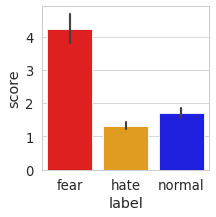

In [136]:
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (3, 3)
sns.set(context='paper',style='whitegrid',font_scale=1.5)

# Draw a nested barplot by species and sex
g = sns.barplot(
    data=df_repost,
    x="label", y="score",  palette=['red','orange','blue'])
plt.show()

In [137]:
average_likes={}

for user in tqdm_notebook(user_received_posts,total=len(user_received_posts)):
    fear=0
    hate=0
    normal=0
    ambi=0
    for id1 in user_received_posts[user]:
        if(dict_posts[id1]['label']=='normal'):
            normal+=dict_posts[id1]['like_count']
        if(dict_posts[id1]['label']=='fearspeech'):
            fear+=dict_posts[id1]['like_count']
        if(dict_posts[id1]['label']=='hatespeech'):
            hate+=dict_posts[id1]['like_count']
        if(dict_posts[id1]['label']=='ambiguous'):
            ambi+=dict_posts[id1]['like_count']
        
    average_likes[user]={'fear':fear, 'hate':hate, 'normal':normal, 'ambiguous':ambi}
    

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
for user in average_likes.keys():
    for key in average_likes[user].keys():
        average_likes[user][key]=average_likes[user][key]/percentage_different_posts[user][key]

In [139]:
likes_dictionary={}
for key in average_likes.keys():
    for label in average_likes[key]:
        if(label!='ambiguous'):
            likes_dictionary[key+label]={
                'label':label,
                'score':average_likes[key][label]
            }
df_likes=pd.DataFrame(likes_dictionary).transpose().reset_index(drop=True)

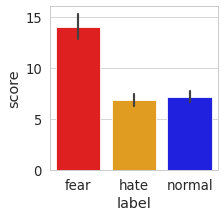

In [140]:
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (3, 3)
sns.set(context='paper',style='whitegrid',font_scale=1.5)

# Draw a nested barplot by species and sex
g = sns.barplot(
    data=df_likes,
    x="label", y="score", palette=['red','orange','blue']
)
plt.show()

In [141]:
post_wise_repost={}
for key in tqdm_notebook(dict_repost.keys()):
    element = dict_repost[key]['reposts']
    for ele in element:
        try:
            post_wise_repost[ele[0]][key]=ele[1]
        except KeyError:
            post_wise_repost[ele[0]]={}
            post_wise_repost[ele[0]][key]=ele[1]

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [142]:
reposts_by_normal={}

for user in tqdm_notebook(user_received_posts,total=len(user_received_posts)):
    fear=0
    hate=0
    normal=0
    ambi=0
    for id1 in user_received_posts[user]:
        try:
            temp=post_wise_repost[id1][user]
        except KeyError:
            continue
        
        
        if(dict_posts[id1]['label']=='normal'):
            normal+=1
        if(dict_posts[id1]['label']=='fearspeech'):
            fear+=1
        if(dict_posts[id1]['label']=='hatespeech'):
            hate+=1
        if(dict_posts[id1]['label']=='ambiguous'):
            ambi+=1
        
    reposts_by_normal[user]={'fear':fear, 'hate':hate, 'normal':normal, 'ambiguous':ambi}
    

/home/punyajoy/.conda/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
reposts_by_normal[user]

{'fear': 0, 'hate': 0, 'normal': 3, 'ambiguous': 0}

In [104]:
for user in reposts_by_normal.keys():
    for key in reposts_by_normal[user].keys():
        reposts_by_normal[user][key]=reposts_by_normal[user][key]/percentage_different_posts[user][key]

In [150]:
normal_repost_dictionary={}
for key in reposts_by_normal.keys():
    for label in reposts_by_normal[key]:
        if(label!='ambiguous' and label!='normal'):
            normal_repost_dictionary[key+label]={
                'label':label,
                'score':reposts_by_normal[key][label]
            }
df_normal_reposts=pd.DataFrame(normal_repost_dictionary).transpose().reset_index(drop=True)

In [151]:
df_normal_reposts

,label,score
0,fear,0
1,hate,0
2,fear,0
3,hate,0
4,fear,0
...,...,...
353,hate,1
354,fear,0
355,hate,0
356,fear,0


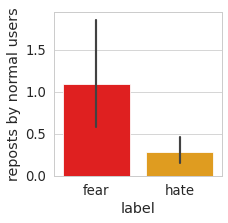

In [154]:
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (3, 3)
sns.set(context='paper',style='whitegrid',font_scale=1.5)


# Draw a nested barplot by species and sex
g = sns.barplot(
    data=df_normal_reposts,
    x="label", y="score", palette=['red','orange'])
plt.ylabel('reposts by normal users')
plt.show()

In [153]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
seed(1)

treatment=list(df_normal_reposts[(df_normal_reposts['label']=='fear')]['score'])
control=list(df_normal_reposts[(df_normal_reposts['label']=='hate')]['score'])
print("F",np.mean(treatment))
print("H",np.mean(control))

stat, p = mannwhitneyu(treatment, control,alternative='two-sided')
print('Statistics=%.3f, p=%.10f' % (stat, p))

F 1.094972067039106
H 0.2849162011173184
Statistics=18843.000, p=0.0000878219
